In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Leveraged Debt', min_assets=.01, max_expense=1.2)
equities = screen_funds('Equities', 'Leveraged Equity', min_assets=.01, max_expense=1.2)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 40, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

4 54
from 2019-06-04 to 2019-07-12 - 58


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

56


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
JNUG,23,1.619468,2.558972,0.629757,45.080461,18.740160
NUGT,23,1.609831,2.222256,0.720842,50.486617,17.417822
BRZU,23,1.265854,1.572464,0.799966,30.365608,7.626808
GDXX,23,1.105111,1.480251,0.741208,32.668583,12.050224
RUSL,23,0.937259,0.837675,1.109407,25.345369,3.627551
TQQQ,23,0.923577,0.933095,0.981293,34.769772,5.578252
TECL,23,0.877175,0.968736,0.897291,37.250939,6.350867
SOXL,23,0.865376,1.620521,0.529113,34.122773,14.554020
LBJ,23,0.844517,1.151969,0.726217,19.860219,7.729469


{'FINU': 0.358, 'GDXX': 0.285, 'RETL': 0.357} 0.674


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,23.0,0.678850,0.377124,-0.042869,0.441628,0.579073,0.925328,1.355020,1.779025,19.912693,2.290218
GDXX,23.0,1.105111,1.480251,-2.509569,0.235332,0.757191,1.733977,4.409281,0.741208,32.668583,12.050224
RETL,23.0,0.509337,0.748605,-1.124902,0.094535,0.554388,1.043076,2.073049,0.669779,12.520034,6.700593
FINU,23.0,0.494793,0.796231,-0.876029,-0.029845,0.293012,0.829508,2.177150,0.611451,17.129873,4.314635


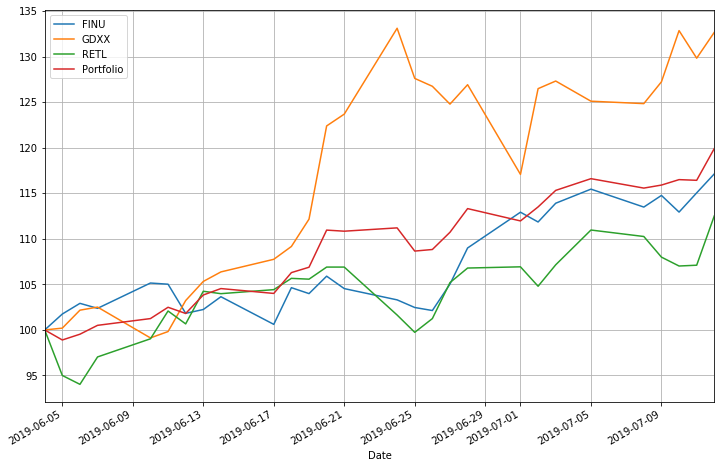

In [4]:
quote.setup_mask(['FINU', 'GDXX', 'RETL'])
ratio, mean, *_ = quote.find_optimal_ratio(_lambda=-1)
print(ratio, mean)
quote.graph(ratio)

evicted UYM 0.726 -0.479
evicted SAA 0.756 -0.378
evicted UCC 0.751 -0.363
evicted CHAU 0.736 -0.141
evicted DFEN 0.712 -0.283
evicted RUSL 0.602 -0.111
evicted LABU 0.639 -0.186
evicted TMF 0.246 -0.366
evicted DIG 0.555 -0.286
evicted FAS 0.474 -0.426
evicted BRZU 0.370 -0.090
evicted GDXX 0.306 -0.476
retry backlogs ['DZK', 'EURL', 'TECL', 'UXI', 'EDC', 'URE', 'UDOW', 'UMDD', 'MIDU', 'JPNL', 'EET', 'MVV', 'DDM', 'TQQQ', 'ROM', 'QLD', 'PPLC', 'UBT', 'TYD', 'RXL', 'SSO', 'JNUG', 'NUGT', 'UWM', 'UST', 'UBIO', 'UYG', 'SOXL', 'ERX', 'URTY', 'XPP', 'FINU', 'TNA', 'SPXL', 'CURE', 'UPRO', 'LBJ', 'DRN', 'YINN', 'BIB', 'GUSH', 'UPW'] at 0.805/-0.51 - 0.92
evicted UWM 0.789 -0.345
evicted JPNL 0.737 -0.149
evicted QLD 0.607 -0.077
evicted YINN 0.717 -0.202
evicted DRN 0.617 -0.423
evicted UBIO 0.748 -0.075
evicted UBT 0.232 -0.307
evicted LBJ 0.591 -0.164
evicted ERX 0.569 -0.262
evicted FINU 0.459 -0.138
retry backlogs ['UXI', 'URE', 'EDC', 'EET', 'TECL', 'UMDD', 'UDOW', 'ROM', 'DDM', 'EURL',

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,23.0,0.678850,0.377124,-0.042869,0.441628,0.579073,0.925328,1.355020,1.779025,19.912693,2.290218
GDXX,23.0,1.105111,1.480251,-2.509569,0.235332,0.757191,1.733977,4.409281,0.741208,32.668583,12.050224
RETL,23.0,0.509337,0.748605,-1.124902,0.094535,0.554388,1.043076,2.073049,0.669779,12.520034,6.700593
FINU,23.0,0.494793,0.796231,-0.876029,-0.029845,0.293012,0.829508,2.177150,0.611451,17.129873,4.314635


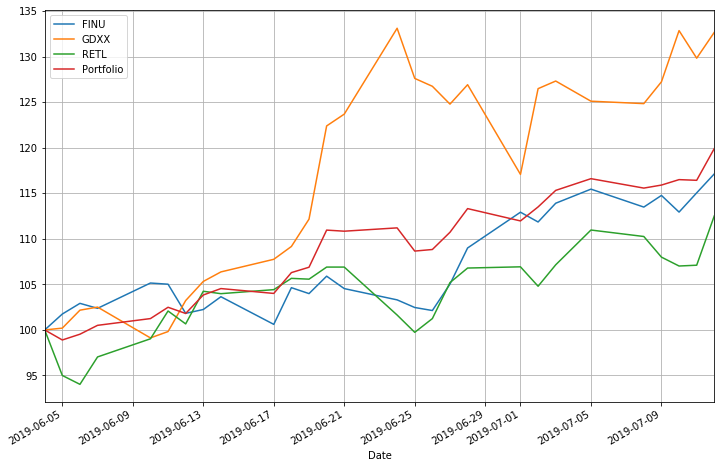

In [5]:
bounds = .54, .81
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(backlogs_pos_threshold=.8, _lambda=-1, bounds=bounds)
quote.setup_mask(['FINU', 'GDXX', 'RETL'])
sd.update(quote.optimize_portfolio(_lambda=-1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=-1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)